In [1]:
;cd "/home/bachir/Dropbox/AAA_Bachir/Learning_with_side_information/Code/"

/home/bachir/Dropbox/AAA_Bachir/Learning_with_side_information/Code


In [2]:
]activate learning_ds

In [29]:
include("plotting_utilities.jl")
include("ode_helper.jl")
using Plots
using DataFrames
using CSV

Loaded diff equations


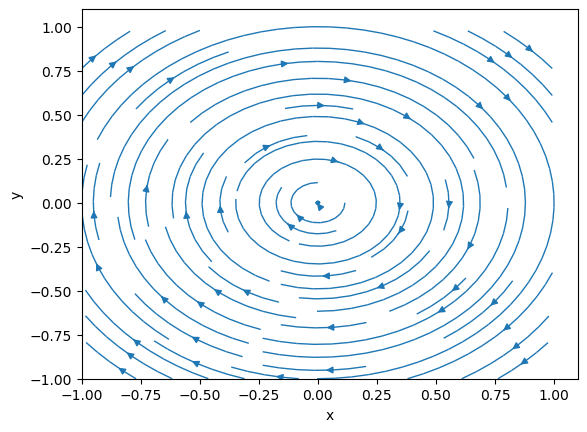

PyObject Text(24.0, 0.5, 'y')

In [59]:
vf = (x, y) -> (y, -x)
pyplot(size = (400,400))
plot_vectorfield(vf, (-1, 1, 10), (-1, 1, 10))
PyPlot.xlabel("x")
PyPlot.ylabel("y")

In [60]:
function _gen_starting_points(shape)
    """Yield starting points for streamlines.
    Trying points on the boundary first gives higher quality streamlines.
    This algorithm starts with a point on the mask corner and spirals inward.
    This algorithm is inefficient, but fast compared to rest of streamplot.
    """
    ny, nx = shape
    xfirst = 0
    yfirst = 1
    xlast = nx - 1
    ylast = ny - 1
    x, y = 0, 0
    direction = "right"
    starting_points = []
    for i in 0:(nx * ny-1)
        push!(starting_points, (x, y))
        if direction == "right"
            x += 1
            if x >= xlast
                xlast -= 1
                direction = "up"
            end
        elseif direction == "up"
            y += 1
            if y >= ylast
                ylast -= 1
                direction = "left"
            end
        elseif direction == "left"
            x -= 1
            if x <= xfirst
                xfirst += 1
                direction = "down"
        end
        elseif direction == "down"
            y -= 1
            if y <= yfirst
                yfirst += 1
                direction = "right"
            end  
        end
    end
    starting_points
end
#_gen_starting_points((10, 10))

_gen_starting_points (generic function with 1 method)

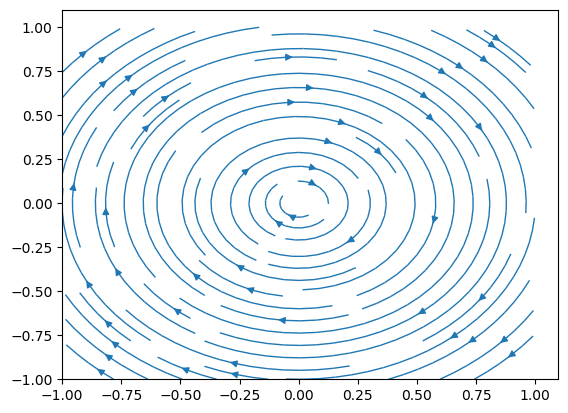

(PyObject <matplotlib.streamplot.StreamplotSet object at 0x7fc8a1c09c88>, 746×4 DataFrame
│ Row │ x1          │ x2         │ y1         │ y2          │
│     │ Float64     │ Float64    │ Float64    │ Float64     │
├─────┼─────────────┼────────────┼────────────┼─────────────┤
│ 1   │ -0.782214   │ -0.836227  │ -1.0       │ -0.955294   │
│ 2   │ -0.836227   │ -0.887686  │ -0.955294  │ -0.907678   │
│ 3   │ -0.887686   │ -0.936439  │ -0.907678  │ -0.857294   │
│ 4   │ -0.936439   │ -0.982333  │ -0.857294  │ -0.804299   │
│ 5   │ -0.637024   │ -0.695009  │ -1.0       │ -0.960607   │
│ 6   │ -0.695009   │ -0.750562  │ -0.960607  │ -0.917859   │
│ 7   │ -0.750562   │ -0.803491  │ -0.917859  │ -0.871902   │
│ 8   │ -0.803491   │ -0.853611  │ -0.871902  │ -0.8229     │
│ 9   │ -0.853611   │ -0.90075   │ -0.8229    │ -0.771018   │
│ 10  │ -0.90075    │ -0.944741  │ -0.771018  │ -0.716442   │
⋮
│ 736 │ -0.0726888  │ -0.0792016 │ -0.0328312 │ -0.0100775  │
│ 737 │ -0.0792016  │ -0.0783545 │ -0.01

In [61]:
function latex_vectorfield(f, limits_x, limits_y)
    my_streamplot = plot_vectorfield(f, limits_x, limits_y)
    transform = PyPlot.axes().transData.inverted().transform

    arrows = []
    names = split("x1 x2 x3 y1 y2 y3")
    names = Symbol.(names)
    for a in my_streamplot.arrows.get_paths()
        v = transform(a.to_polygons()[2])
        push!(arrows, [v[1:3, 1]..., v[1:3, 2]...])
    end 
    arrows = hcat(arrows...)'
    #DataFrame(columns=[arrows[i, :] for i in 1:6], names=names)
    arrows = convert(DataFrame, arrows)
    arrows = names!(arrows, names)


    segments = my_streamplot.lines.get_segments()
    segments = map(v -> vcat(v...), segments)
    segments = hcat(segments...)'
    segments = DataFrame(x1=segments[:,1], x2=segments[:,2],
                y1=segments[:,3], y2=segments[:,4])
    return my_streamplot, segments, arrows
end

my_streamplot, segments, arrows = latex_vectorfield(vf, (-1, 1, 20), (-1, 1, 20))
CSV.write("segments_vf.csv", segments)
CSV.write("arrows_vf.csv", arrows)

In [62]:
CSV.write("segments_vf.csv", segments)
CSV.write("arrows_vf.csv", arrows)

"arrows_vf.csv"

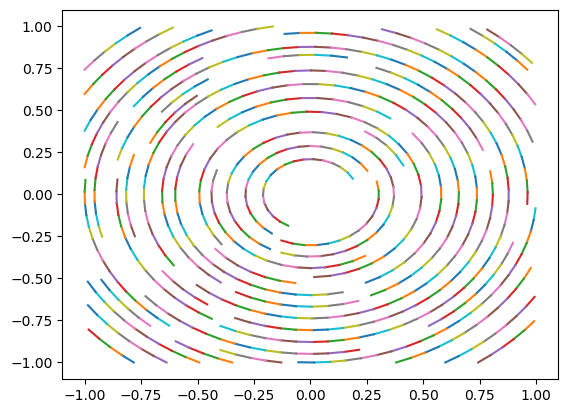

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[63]:2
└ @ Core ./In[63]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[63]:2
└ @ Core ./In[63]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[63]:2
└ @ Core ./In[63]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[63]:2
└ @ Core ./In[63]:2


In [63]:
for i=1:700
    plt.plot( [segments[:x1][i], segments[:x2][i]], [segments[:y1][i], segments[:y2][i]])
end